In [62]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [39]:
ruta = os.path.join('Buscador-de-carreras-2022.xlsx')
carreras = pd.read_excel(ruta)
#https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row
header = carreras.iloc[0] 
carreras = carreras[1:] 
carreras.columns = header
carreras = carreras.dropna()
carreras = carreras.replace('s/i', np.NaN).dropna()
carreras['Municipal y Servicios Locales'] = carreras['Municipal y Servicios Locales'].astype(np.float64)
carreras['Particular Subvencionado '] = carreras['Particular Subvencionado '].astype(np.float64)
carreras['Particular Pagado'] = carreras['Particular Pagado'].astype(np.float64)
carreras['Administración Delegada'] = carreras['Administración Delegada'].astype(np.float64)
carreras[['Particular Subvencionado ', 'Particular Pagado', 'Administración Delegada']]

,Particular Subvencionado,Particular Pagado,Administración Delegada
1,0.644068,0.050847,0.000000
2,0.564103,0.076923,0.128205
3,0.452632,0.347368,0.010526
4,0.505051,0.151515,0.020202
5,0.423913,0.358696,0.010870
...,...,...,...
10935,0.623377,0.272727,0.038961
10936,0.679487,0.179487,0.012821
10937,0.560976,0.121951,0.097561
10938,0.617021,0.297872,0.000000


ingreso a universidades vs tipo de colegio

In [58]:
instituciones = carreras.groupby('Tipo de institución').mean()
instituciones = instituciones[['Municipal y Servicios Locales', 'Particular Subvencionado ', 'Particular Pagado', 'Administración Delegada']]
instituciones

,Municipal y Servicios Locales,Particular Subvencionado,Particular Pagado,Administración Delegada
Tipo de institución,,,,
Centros de Formación Técnica,0.463645,0.466640,0.024341,0.045374
Institutos Profesionales,0.407433,0.503828,0.032254,0.056485
Universidades,0.302211,0.550379,0.117328,0.030081


In [63]:
universidades = instituciones[instituciones.index == 'Universidades']
ip = instituciones[instituciones.index== 'Institutos Profesionales']
cft = instituciones[instituciones.index ==  'Centros de Formación Técnica']
universidades

,Municipal y Servicios Locales,Particular Subvencionado,Particular Pagado,Administración Delegada
Tipo de institución,,,,
Universidades,0.302211,0.550379,0.117328,0.030081


Text(0.5, 1.0, 'Institutos Profesionales')

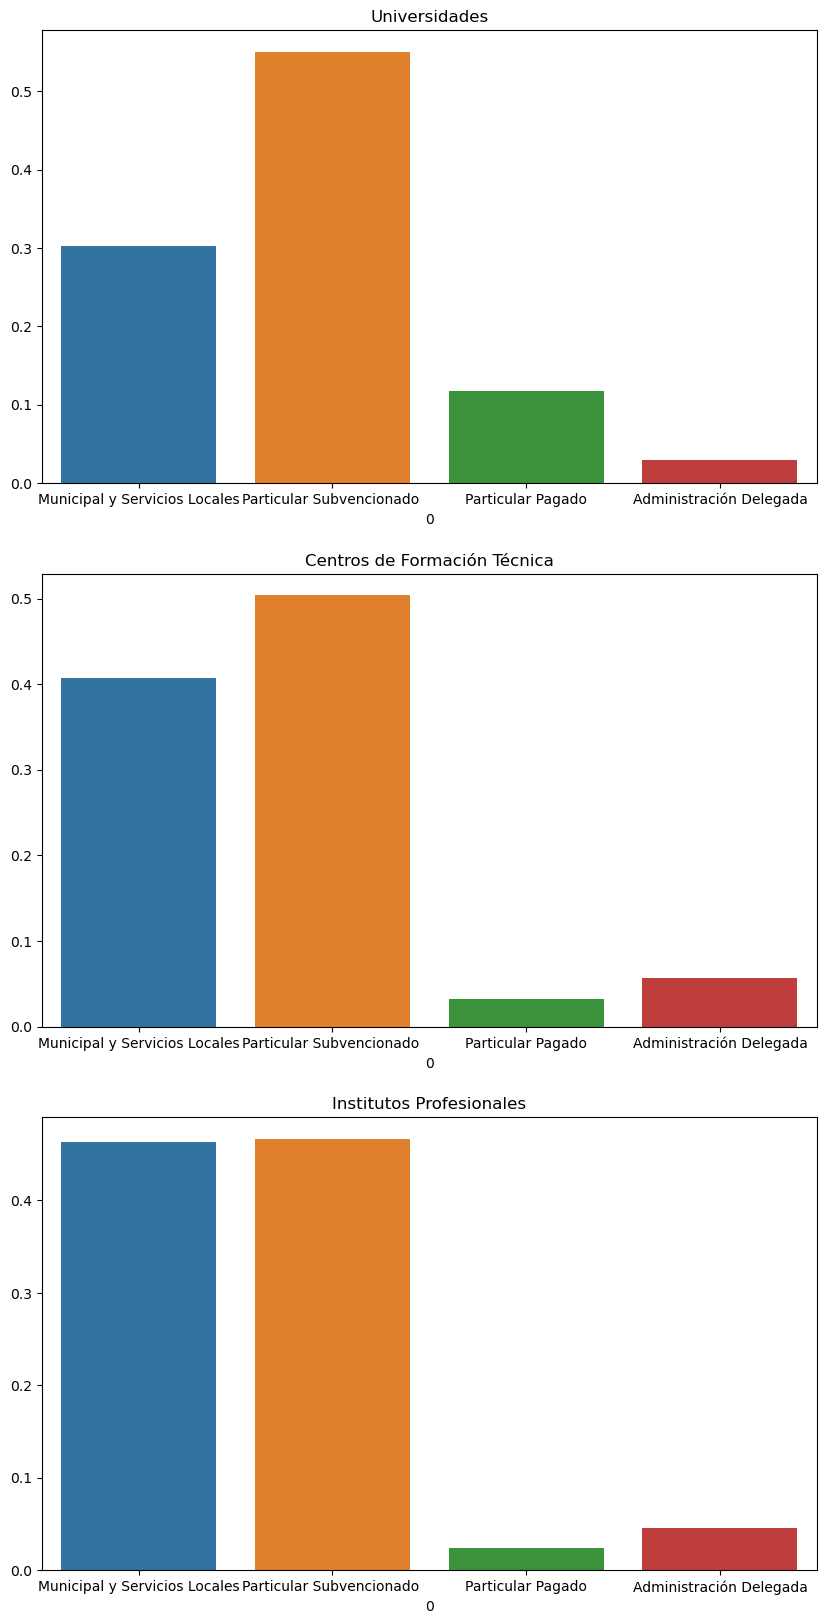

In [95]:
fig, axes = plt.subplots(nrows = 3, figsize = (10, 20))
sns.barplot(data = universidades, ax = axes[0])
sns.barplot(data = ip, ax = axes[1])
sns.barplot(data = cft, ax = axes[2])
axes[0].set_title(universidades.index[0])
axes[1].set_title(cft.index[0])
axes[2].set_title(ip.index[0])